# import libraries and data

In [1]:
import os
import shutil
import itertools
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from os import listdir
from os.path import isfile, join, isdir
import matplotlib.pyplot as plt
import seaborn as sns

# helper functions

In [2]:
# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder_path):
      
    # Path
    path = os.path.join(parent_folder_path, folder_name)
      
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
          
    except OSError as error: 
        print(error)

In [3]:
def calc_RMSE(df, epochs, type='train'):
    rmse = []
    for epoch in range(epochs):
        rms = mean_squared_error(df[str(epoch)], df.iloc[:,-1:], squared=False)
        rmse.append(rms)
    return rmse

In [4]:
def merge_folders(onlydir):
    # return if nothing to merge
    if not onlydir:
        return
    
    # merge folders
    current_folder = os.getcwd() 
    
    content_list = []
    for idx, dir in enumerate(onlydir):
        path = os.path.join(file_path, dir)
        content_list.append(os.listdir(path))
        
    # create merged folder name
    merge_folder = onlydir[0][:-7] + "_combined"
    merge_folder_path = os.path.join(current_folder, merge_folder) 
    make_new_folder(merge_folder, os.getcwd())
    
    # move files
    for idx, sub_dir in enumerate(onlydir):
        # loop through the contents of the list of folders
        for contents in content_list[idx]:

            # make the path of the content to move 
            path_to_content = file_path + sub_dir + "/" + contents  

            # make the path with the current folder
            dir_to_move = os.path.join(current_folder, path_to_content )

            # move the file
            shutil.move(dir_to_move, merge_folder_path)
        
        # delete folder
        os.rmdir(file_path + sub_dir)

# merge folders

In [5]:
# get list of folders in extracted
file_path = "extracted/"
current_folder = os.getcwd() 
onlydir = [f for f in listdir(file_path) if isdir(join(file_path, f))]
# print(onlydir)

In [6]:
# combine every 4 items in a list
no_parties = 4
onlydir = [onlydir[x:x+no_parties] for x in range(0, len(onlydir), no_parties)]

In [7]:
for aggregation in onlydir:
    if len(aggregation) != no_parties:
        raise exception
    merge_folders(aggregation)

# key parameters for a single aggregation

In [8]:
# define where the latest dc_federated results are stored
latest_path = "31_07_2021_172600_combined/"

In [9]:
# define how many epochs per aggregation
df = pd.read_csv(latest_path+"1_yhat_train_worker_A.csv")
no_epochs = len(df.columns.values) - 2

In [10]:
# define file names
train_name = "_yhat_train_worker_"
test_name = "_yhat_test_worker_"
worker_A = 'A.csv'
worker_B = 'B.csv'
worker_C = 'C.csv'

In [11]:
# get the number of aggregation rounds
onlyfiles = [f for f in listdir(latest_path) if isfile(join(latest_path, f))]
no_aggre = max([int(f.partition('_')[0]) for f in onlyfiles]) - 1
max_aggre = 4

# individual train results

Worker A final train RMSE: 48.43
Worker B final train RMSE: 41.83
Worker C final train RMSE: 45.74


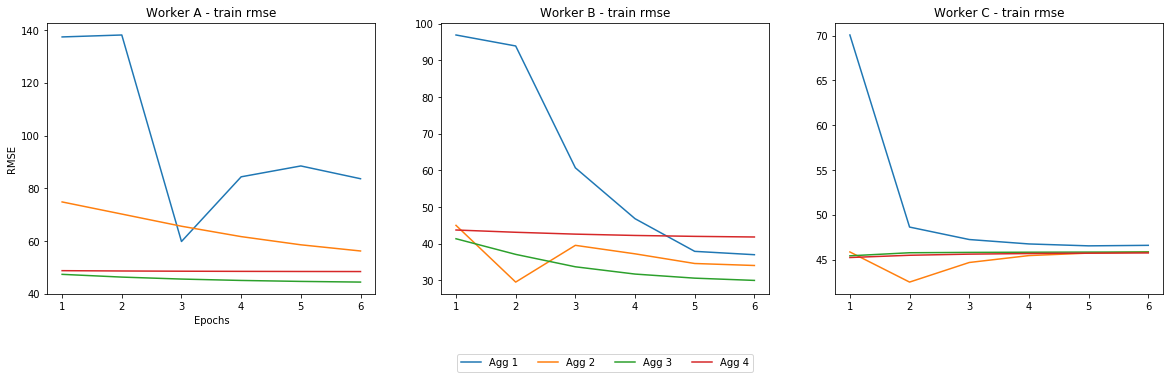

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # width x height)
rmse_A, rmse_B, rmse_C = 0, 0, 0
for aggre in range(min(no_aggre, max_aggre)):
    aggre += 1
    df_A = pd.read_csv(latest_path + str(aggre) + train_name + worker_A)
    rmse_A = calc_RMSE(df_A, no_epochs)
    axes[0].plot(range(1, len(rmse_A)+1), rmse_A, label="Agg "+str(aggre))
    
    df_B = pd.read_csv(latest_path + str(aggre) + train_name + worker_B)
    rmse_B = calc_RMSE(df_B, no_epochs)
    axes[1].plot(range(1, len(rmse_B)+1), rmse_B, label="Agg "+str(aggre))
    
    df_C = pd.read_csv(latest_path + str(aggre) + train_name + worker_C)
    rmse_C = calc_RMSE(df_C, no_epochs)
    axes[2].plot(range(1, len(rmse_C)+1), rmse_C, label="Agg "+str(aggre))
  
print('Worker A final train RMSE: '+ '{0:.2f}'.format(rmse_A[-1]))  
print('Worker B final train RMSE: '+ '{0:.2f}'.format(rmse_B[-1]))  
print('Worker C final train RMSE: '+ '{0:.2f}'.format(rmse_C[-1]))  

for i in range(3):
    axes[i].title.set_text('Worker ' + chr(65+i) + ' - train rmse') 

axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
_ = axes[0].set_xlabel("Epochs")
_ = axes[0].set_ylabel("RMSE")

# individual test results

Worker A final test RMSE: 37.63
Worker B final test RMSE: 42.14
Worker C final test RMSE: 42.92


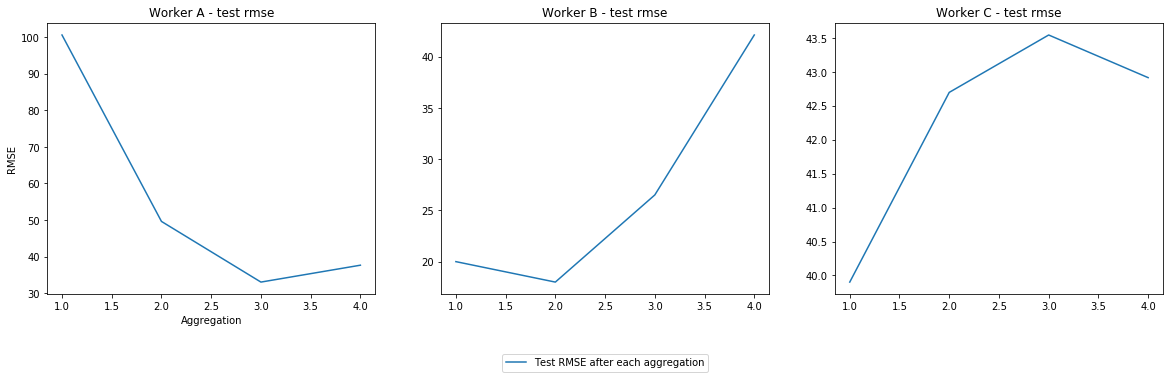

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # width x height)
rmse_A, rmse_B, rmse_C = 0, 0, 0

for i, worker in enumerate(['A.csv', 'B.csv', 'C.csv']):
    rmse_list = []
    for aggre in range(min(no_aggre, max_aggre)):
        df = pd.read_csv(latest_path + str(aggre+1) + test_name + worker)
        rmse = calc_RMSE(df, 1)
        rmse_list.append(rmse)
    axes[i].plot(range(1, len(rmse_list)+1), rmse_list, label="Test RMSE after each aggregation")
    print('Worker ' + chr(65+i) + ' final test RMSE: '+ '{0:.2f}'.format(rmse_list[-1][0]))

for i in range(3):
    axes[i].title.set_text('Worker ' + chr(65+i) + ' - test rmse')   

axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
_ = axes[0].set_xlabel("Aggregation")
_ = axes[0].set_ylabel("RMSE")

# list of all federated results